In [1]:
# El objetivo de este codigo, es leer todos los numeros de una imagen,

# Se entrena el modelo utilizando un dataset de sklearn y se analiza con profundidad.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

origin = load_digits()

In [2]:
# Se estandarizan los datos.

from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(origin.data)
 
print(df.shape)

(1797, 64)


In [3]:
# Matriz de Covarianza
cov_matrix = np.cov(df.T)
print("Shape of Covariance Matrix :  ", cov_matrix.shape)

Shape of Covariance Matrix :   (64, 64)


In [5]:
# Se transforma la data

EValue, EVector = np.linalg.eig(cov_matrix)
Z = np.dot(df,EVector)
Z.shape

(1797, 64)

In [7]:
# Modelo PCA

from sklearn.decomposition  import PCA
from mpl_toolkits.mplot3d import axes3d, Axes3D  

pca = PCA(n_components=3) # n_components, para definir la reduccion de componentes, ya que cada dato tenia 64 componentes.
pca.fit(df.data)
Z1 = pca.transform(df.data)
print("Shape de la data transformada : ", Z1.shape)

Shape de la data transformada :  (1797, 3)


In [8]:
# Combinar las dimensiones
new_dataframe = pd.DataFrame(Z1)
new_dataframe.columns=['dim_1','dim_2','dim_3']
new_dataframe['labels'] = origin.target
new_dataframe.head()

,dim_1,dim_2,dim_3,labels
0,1.914215,-0.954502,-3.946032,0
1,0.588980,0.924637,3.924754,1
2,1.302037,-0.317187,3.023319,2
3,-3.020771,-0.868773,-0.801747,3
4,4.528949,-1.093480,0.973119,4


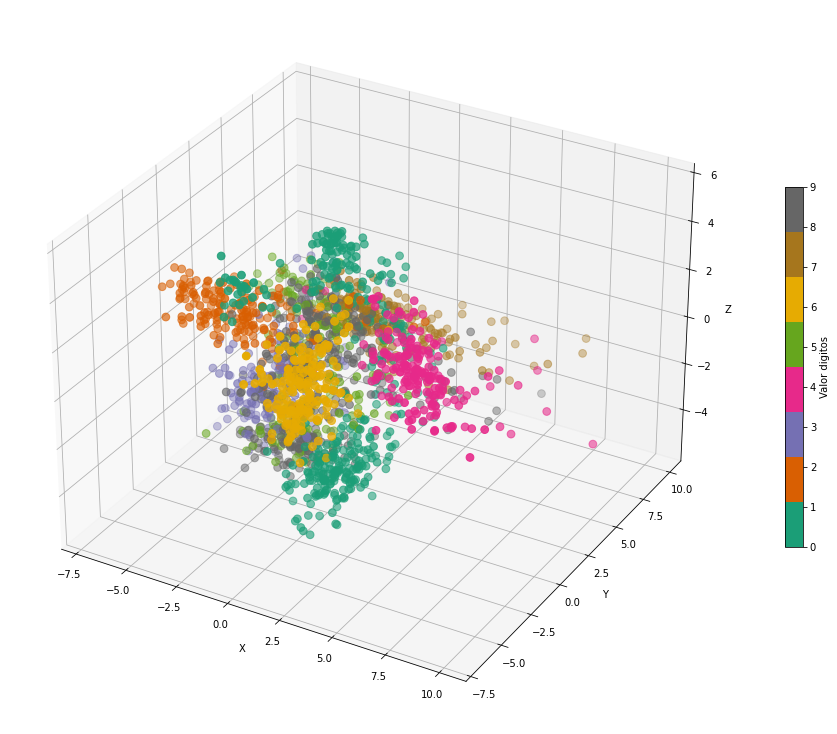

In [9]:
# Visualizacion en 3 dimensiones

fig = plt.figure(figsize=(16,10))
ax = Axes3D(fig)
p = ax.scatter(xs=new_dataframe['dim_1'], ys=new_dataframe['dim_2'], zs=new_dataframe['dim_3'], c=new_dataframe['labels'], cmap='Dark2',marker='o',s=60)#i)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.colorbar(p,orientation='vertical',shrink = 0.5,label='Valor digitos')
plt.show()

In [10]:
import imageio

# Lectura de imagen
img = imageio.imread('ImagenCaso.jpg')

Se planea dividir la imagen utilizando las lineas negras como referencia con "np.asarray",

En un caso real, hay que bajar la calidad de la imagen hasta tener los numeros separados por un espectro de color similar (Usualmente seria blanco o derivados de blanco), asi separar los numeros en imagenes diferentes y luego estandarizar el tamaño de cada uno.

Como no encontre la forma, sera dividido en **multiplos de 40.**

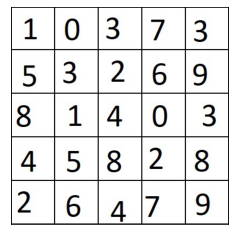

In [11]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [12]:
img_y, img_x, pixel = img.shape # x = ancho \\ y = alto
alto = 80
ancho = 80

array = np.zeros((img_y // alto,
                  img_x // ancho,
                  alto,
                  ancho,
                  pixel))

y = x = 0

for i in range(0, img_y, alto):
    for j in range(0, img_x, ancho):
        array[y][x] = img[i:i+alto,
                          j:j+ancho,
                         :pixel]
        x +=1
    y += 1
    x = 0

In [13]:
array.shape

(5, 5, 80, 80, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


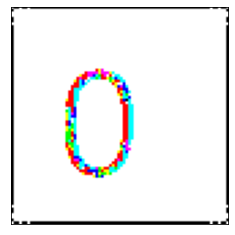

In [14]:
# Tiene las imagenes cortadas, pero por alguna razon, las devuelve con un color completamente diferente.

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(array[0,1]);

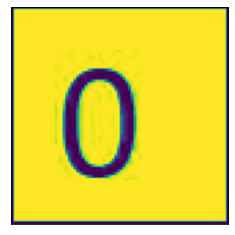

In [20]:
# Esto pasa si solo usamos un componente, tiene mas sentido.

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(array[0,1,:,:,0]);

In [ ]:
# Ahora falta preparar cada imagen en arrays que cumplan la lectura del modelo.